In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsiter2'

db_username_1 = 'postgres'
db_password_1 = 'Simulation2024'
db_host_1 = 'localhost'
db_port_1 = '5432'
db_name_1 = 'simulationdatainit'
table_name_1 = 'simulationsagg1'

db_username_2 = 'postgres'
db_password_2 = 'Simulation2024'
db_host_2 = 'localhost'
db_port_2 = '5432'
db_name_2 = 'simulationdatainit'
table_name_2 = 'simulationsagg2'

db_username_3 = 'postgres'
db_password_3 = 'Simulation2024'
db_host_3 = 'localhost'
db_port_3 = '5432'
db_name_3 = 'simulationdatainit'
table_name_3 = 'simulationsagg3'

In [3]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

connection_string = f"postgresql://{db_username_1}:{db_password_1}@{db_host_1}:{db_port_1}/{db_name_1}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_1}"
df_1 = pd.read_sql(query, engine)

connection_string = f"postgresql://{db_username_2}:{db_password_2}@{db_host_2}:{db_port_2}/{db_name_2}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_2}"
df_2 = pd.read_sql(query, engine)

connection_string = f"postgresql://{db_username_3}:{db_password_3}@{db_host_3}:{db_port_3}/{db_name_3}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_3}"
df_3 = pd.read_sql(query, engine)

In [4]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,1,100.000000,[164.817],"[164.817, 35.18299999999999]",164498,35502
1,2,0.152642,596.36,119,167.942942,"[303.385, 315.221, 628.592, 724.102, 806.739, ...","[303.385, 11.836000000000013, 313.371, 95.5099...",9197842,10802158
2,3,0.152642,596.36,132,151.413053,"[442.85, 479.665, 962.813, 1158.955, 1744.183,...","[442.85, 36.815, 483.14799999999997, 196.14199...",11903116,8096884
3,4,0.152642,596.36,135,148.533279,"[108.47, 287.98900000000003, 315.961, 1252.636...","[108.47, 179.51900000000003, 27.97199999999998...",10269423,9730577
4,5,0.152642,596.36,126,160.189559,"[274.567, 441.795, 646.383, 658.6510000000001,...","[274.567, 167.228, 204.58800000000002, 12.2680...",10901927,9098073


In [5]:
df_1.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.01,100.00,0,NaN,[],[],2000000,0
1,2,0.01,104.81,0,NaN,[],[],2000000,0
2,3,0.01,109.85,0,NaN,[],[],2000000,0
3,4,0.01,115.14,0,NaN,[],[],2000000,0
4,5,0.01,120.68,0,NaN,[],[],2000000,0


In [6]:
df_2.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.01,100.00,0,NaN,[],[],2000000,0
1,2,0.01,104.81,0,NaN,[],[],2000000,0
2,3,0.01,109.85,0,NaN,[],[],2000000,0
3,4,0.01,115.14,0,NaN,[],[],2000000,0
4,5,0.01,120.68,0,NaN,[],[],2000000,0


In [7]:
df_3.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.01,100.00,0,NaN,[],[],2000000,0
1,2,0.01,104.81,0,NaN,[],[],2000000,0
2,3,0.01,109.85,0,NaN,[],[],2000000,0
3,4,0.01,115.14,0,NaN,[],[],2000000,0
4,5,0.01,120.68,0,NaN,[],[],2000000,0


In [8]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [9]:
#Changing df_0 into cleaned_df_0

df_0 = df_0[(df_0['epsilon'] != .1526418) & (df_0['n_zero_square'] != 596.36)]

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0[(df_0['any_less_than_5'] == False)]
df_0_cleaned.head()



,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
3803,3804,0.019307,104.81,1,1000.000000,[1471.9370000000001],"[1471.94, 528.06]",1469780,530220,1471.940000,False
3902,3903,0.023300,100.00,1,1000.000000,[135.75300000000001],"[135.75, 1864.25]",133554,1866446,135.750000,False
3952,3953,0.025595,100.00,3,500.000000,"[584.367, 630.165, 712.356]","[584.37, 45.8, 82.19, 1287.64]",664448,1335552,237.453333,False
3956,3957,0.025595,120.68,1,1000.000000,[1769.913],"[1769.91, 230.09]",1768315,231685,1769.910000,False
3957,3958,0.025595,126.49,2,666.663333,"[285.95300000000003, 601.337]","[285.95, 315.38, 1398.66]",1683264,316736,300.665000,False


In [10]:
#Changing df_1 into df_1_cleaned

df_1 = df_1[(df_1['epsilon'] != .1526418) & (df_1['n_zero_square'] != 596.36)]

df_1 = df_1[(df_1['reversal_count'] > 0)]
df_1 = update_reversal_durations(df_1, 2000)
df_1['average_reversal_time'] = df_1['reversal_durations'].apply(calculate_average_reversal_time)
df_1['average_reversal_time_excluding_last'] = df_1['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_1_AnyLessThan5 = df_1['reversal_durations'].apply(any_values_less_than_5)
df_1['any_less_than_5'] = df_1_AnyLessThan5
df_1[(df_1['any_less_than_5'] == True)].head()
df_1_cleaned = df_1[(df_1['any_less_than_5'] == False)]
df_1_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
451,452,0.0233,104.81,1,1000.0,[701.867],"[701.87, 1298.13]",700665,1299335,701.87,False
452,453,0.0233,109.85,1,1000.0,[297.914],"[297.91, 1702.09]",295407,1704593,297.91,False
454,455,0.0233,120.68,1,1000.0,[643.352],"[643.35, 1356.65]",642193,1357807,643.35,False
456,457,0.0233,132.57,1,1000.0,[355.158],"[355.16, 1644.84]",353660,1646340,355.16,False
457,458,0.0233,138.95,1,1000.0,[1314.607],"[1314.61, 685.39]",1311943,688057,1314.61,False


In [11]:
#Changing df_2 into df_2_cleaned

df_2 = df_2[(df_2['epsilon'] != .1526418) & (df_2['n_zero_square'] != 596.36)]

df_2 = df_2[(df_2['reversal_count'] > 0)]
df_2 = update_reversal_durations(df_2, 2000)
df_2['average_reversal_time'] = df_2['reversal_durations'].apply(calculate_average_reversal_time)
df_2['average_reversal_time_excluding_last'] = df_2['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_2_AnyLessThan5 = df_2['reversal_durations'].apply(any_values_less_than_5)
df_2['any_less_than_5'] = df_2_AnyLessThan5
df_2[(df_2['any_less_than_5'] == True)].head()
df_2_cleaned = df_2[(df_2['any_less_than_5'] == False)]
df_2_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
354,355,0.019307,120.68,1,1000.000,[709.732],"[709.73, 1290.27]",708225,1291775,709.730000,False
453,454,0.023300,115.14,1,1000.000,[1155.557],"[1155.56, 844.44]",1153331,846669,1155.560000,False
500,501,0.025595,100.00,4,399.998,"[159.294, 213.518, 1066.397, 1577.038]","[159.29, 54.22, 852.88, 510.64, 422.96]",1434678,565322,394.257500,False
504,505,0.025595,120.68,1,1000.000,[1792.777],"[1792.78, 207.22]",1789527,210473,1792.780000,False
550,551,0.028118,100.00,3,500.000,"[1499.047, 1745.24, 1906.002]","[1499.05, 246.19, 160.76, 94.0]",1653755,346245,635.333333,False


In [12]:
#Changing df_3 into df_3_cleaned

df_3 = df_3[(df_3['epsilon'] != .1526418) & (df_3['n_zero_square'] != 596.36)]

df_3 = df_3[(df_3['reversal_count'] > 0)]
df_3 = update_reversal_durations(df_3, 2000)
df_3['average_reversal_time'] = df_3['reversal_durations'].apply(calculate_average_reversal_time)
df_3['average_reversal_time_excluding_last'] = df_3['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_3_AnyLessThan5 = df_3['reversal_durations'].apply(any_values_less_than_5)
df_3['any_less_than_5'] = df_3_AnyLessThan5
df_3[(df_3['any_less_than_5'] == True)].head()
df_3_cleaned = df_3[(df_3['any_less_than_5'] == False)]
df_3_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
353,354,0.019307,115.14,1,1000.0,[892.784],"[892.78, 1107.22]",889674,1110326,892.78,False
402,403,0.021210,109.85,1,1000.0,[1349.753],"[1349.75, 650.25]",1349040,650960,1349.75,False
451,452,0.023300,104.81,1,1000.0,[707.033],"[707.03, 1292.97]",706287,1293713,707.03,False
501,502,0.025595,104.81,1,1000.0,[486.944],"[486.94, 1513.06]",484187,1515813,486.94,False
505,506,0.025595,126.49,1,1000.0,[1246.095],"[1246.1, 753.9]",1246119,753881,1246.10,False


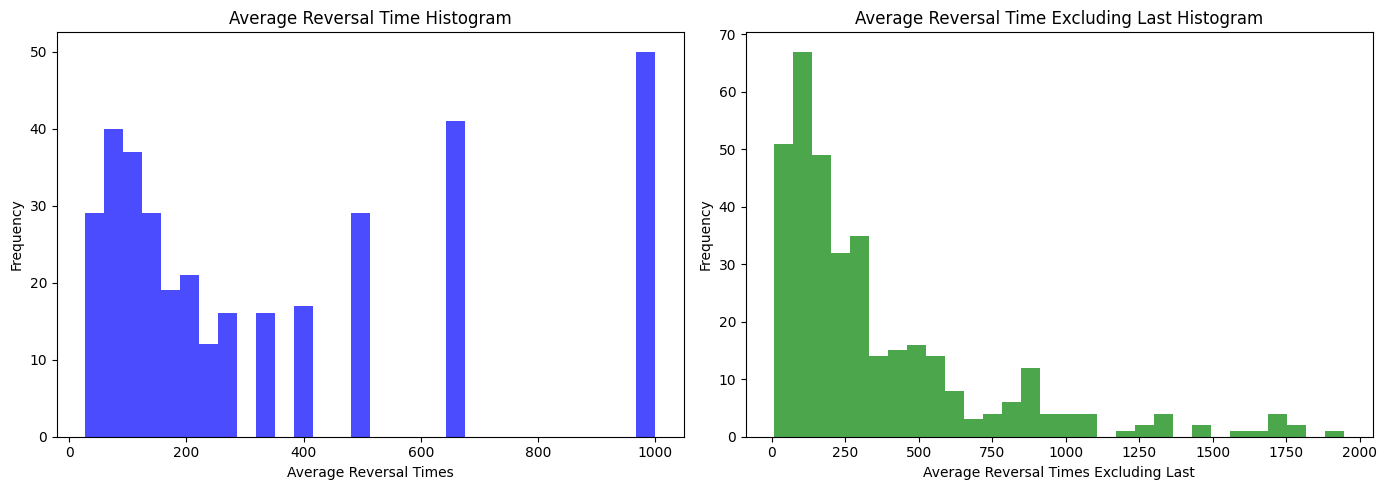

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_0_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_0_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

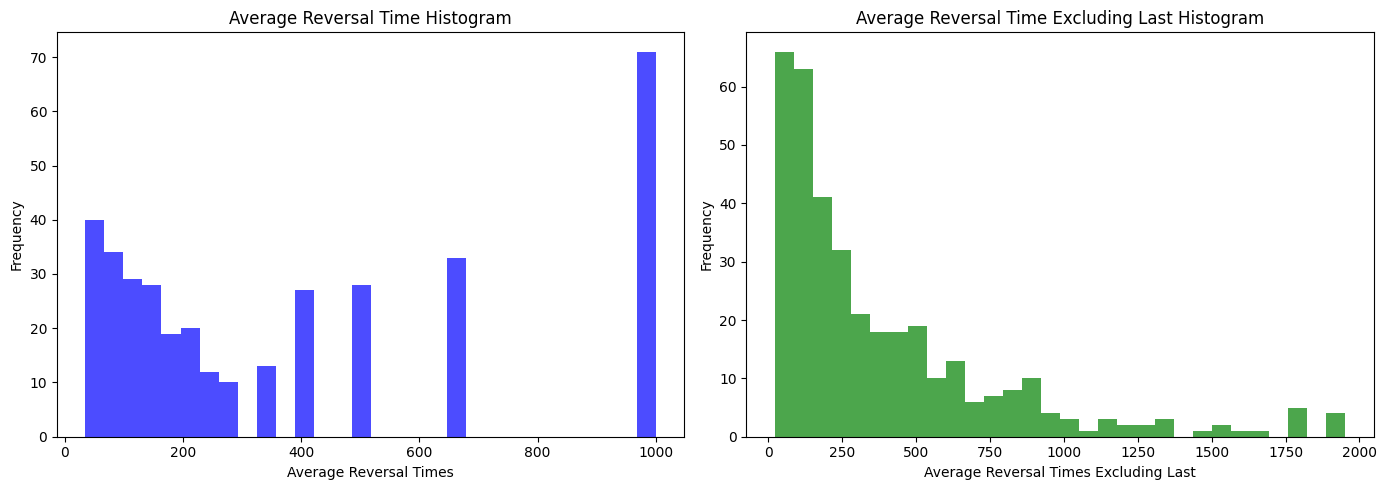

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_1_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_1_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

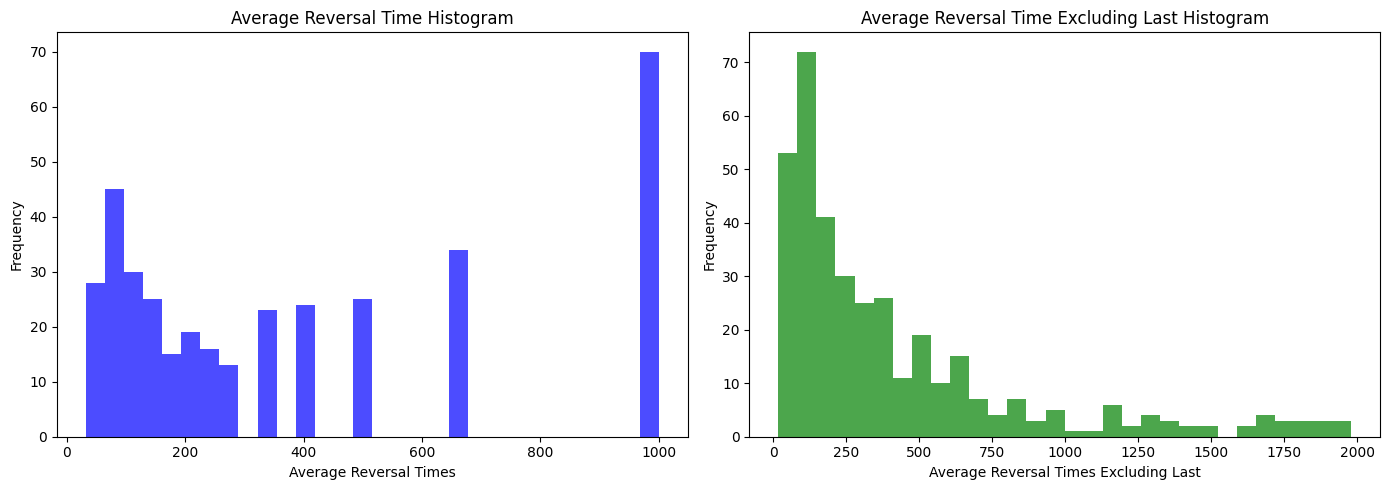

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_2_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_2_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

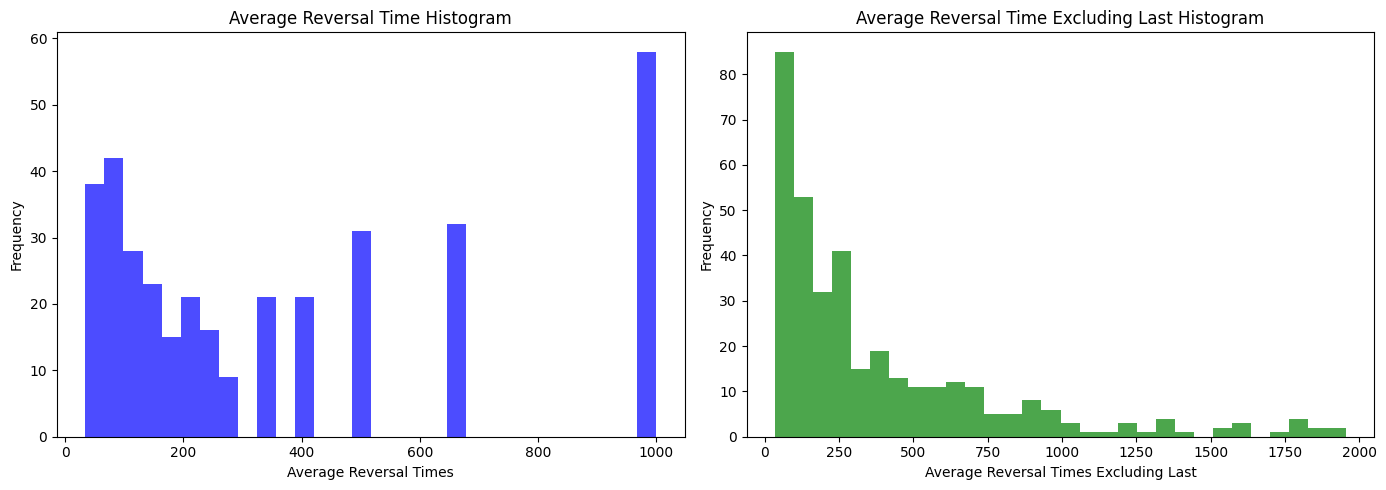

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_3_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_3_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

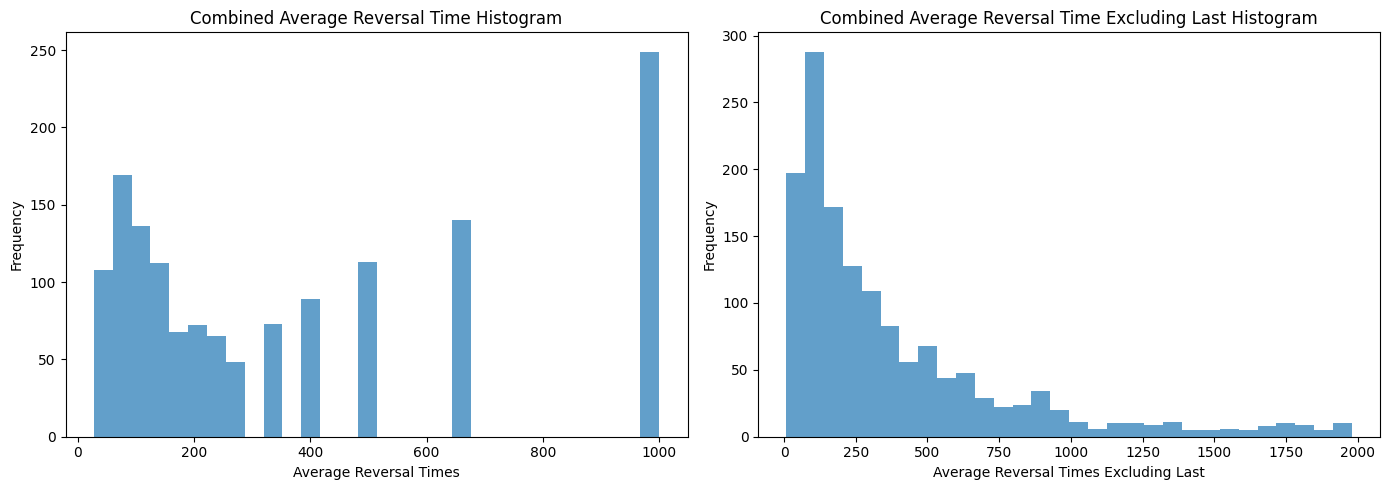

In [17]:
all_average_times = np.concatenate([
    df_0_cleaned['average_reversal_time'],
    df_1_cleaned['average_reversal_time'],
    df_2_cleaned['average_reversal_time'],
    df_3_cleaned['average_reversal_time']
])

all_average_times_excl_last = np.concatenate([
    df_0_cleaned['average_reversal_time_excluding_last'],
    df_1_cleaned['average_reversal_time_excluding_last'],
    df_2_cleaned['average_reversal_time_excluding_last'],
    df_3_cleaned['average_reversal_time_excluding_last']
])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(all_average_times, bins=30, alpha=0.7)
axs[0].set_title('Combined Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(all_average_times_excl_last, bins=30, alpha=0.7)
axs[1].set_title('Combined Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

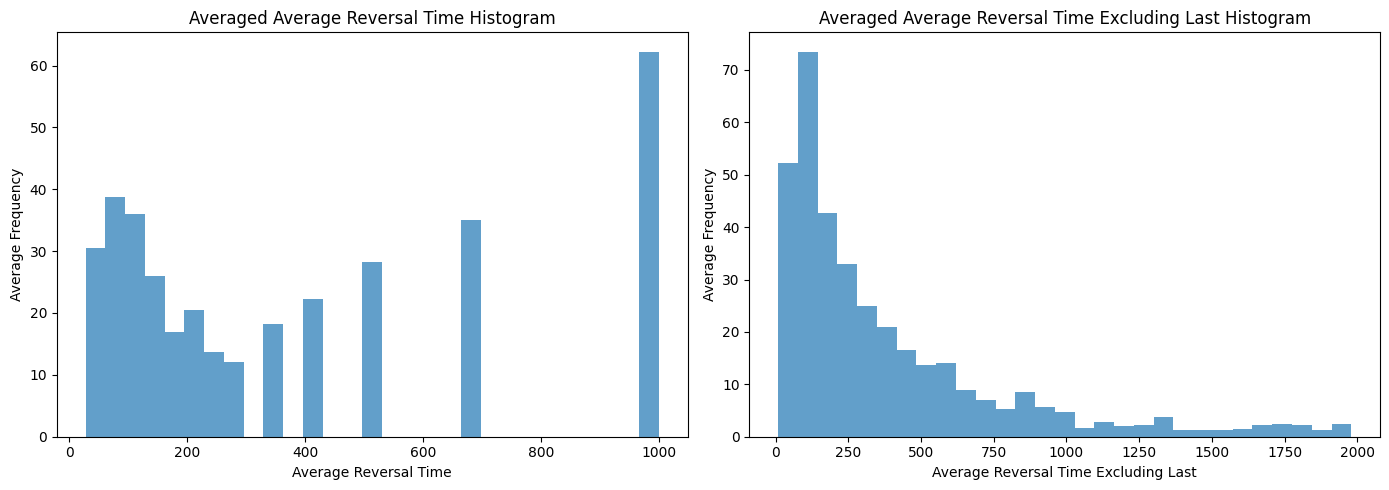

In [18]:
bins = np.linspace(
    min(
        min(df_0_cleaned['average_reversal_time']),
        min(df_1_cleaned['average_reversal_time']),
        min(df_2_cleaned['average_reversal_time']),
        min(df_3_cleaned['average_reversal_time'])
    ),
    max(
        max(df_0_cleaned['average_reversal_time']),
        max(df_1_cleaned['average_reversal_time']),
        max(df_2_cleaned['average_reversal_time']),
        max(df_3_cleaned['average_reversal_time'])
    ),
    30  
)

hist_data = [
    np.histogram(df['average_reversal_time'], bins=bins)[0]
    for df in [df_0_cleaned, df_1_cleaned, df_2_cleaned, df_3_cleaned]
]

average_hist = np.mean(hist_data, axis=0)

bins_excl_last = np.linspace(
    min(
        min(df_0_cleaned['average_reversal_time_excluding_last']),
        min(df_1_cleaned['average_reversal_time_excluding_last']),
        min(df_2_cleaned['average_reversal_time_excluding_last']),
        min(df_3_cleaned['average_reversal_time_excluding_last'])
    ),
    max(
        max(df_0_cleaned['average_reversal_time_excluding_last']),
        max(df_1_cleaned['average_reversal_time_excluding_last']),
        max(df_2_cleaned['average_reversal_time_excluding_last']),
        max(df_3_cleaned['average_reversal_time_excluding_last'])
    ),
    30  
)

hist_data_excl_last = [
    np.histogram(df['average_reversal_time_excluding_last'], bins=bins_excl_last)[0]
    for df in [df_0_cleaned, df_1_cleaned, df_2_cleaned, df_3_cleaned]
]

average_hist_excl_last = np.mean(hist_data_excl_last, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(bins[:-1], bins=bins, weights=average_hist, alpha=0.7)
axs[0].set_title('Averaged Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Time')
axs[0].set_ylabel('Average Frequency')


axs[1].hist(bins_excl_last[:-1], bins=bins_excl_last, weights=average_hist_excl_last, alpha=0.7)
axs[1].set_title('Averaged Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Time Excluding Last')
axs[1].set_ylabel('Average Frequency')

plt.tight_layout()
plt.show()

